## Problem 2: Calculate and visualise the *dominance areas* of shopping centres (10 points)

In this problem, the aim is to delineate the dominance area of each shopping centre. For this 
exercise, we define the ‘dominance area’ of a shopping centre as the area from which it can 
be reached faster than other shopping centres. We will use public transport travel times.

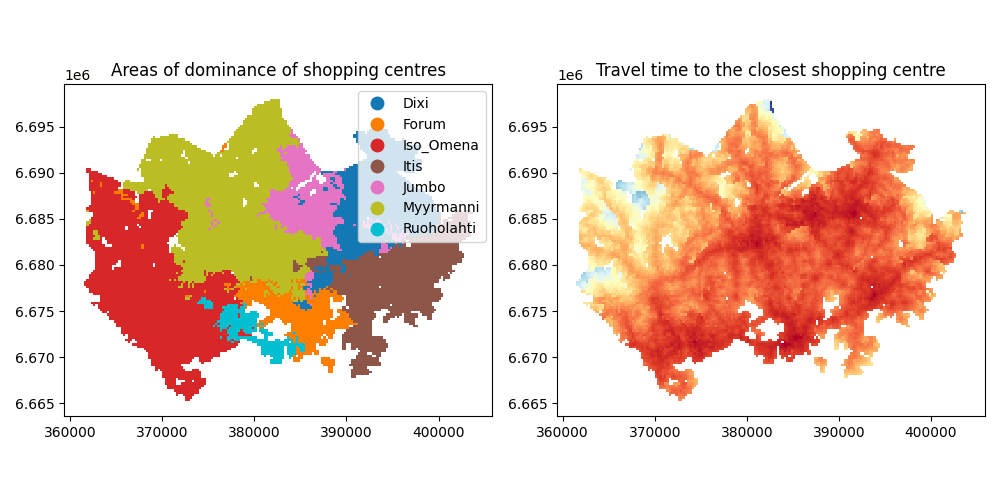

*Sample result: a map showing the areas of dominance of each shopping centre, and the travel 
times to the closest shopping centre in the entire metropolitan area*



---

### Data

The **input data** is identical to what you have used for *problem 1*, 
see [there](./Exercise-4-problem-1.ipynb) for detailed data descriptions.

---


### An overview of the tasks

This task comprises of three major subtasks. In contrast to earlier exercises, we 
do not provide a detailed, step-by-step ‘cooking recipe’. Rather, you are free to
implement the necessary steps in any order you see fit, and choose any variable
names of your liking. 

To test intermediate results, implement `assert` statements, output the `head()`
of a data frame, or plot the data. Remember to add comments to all of your code,
so future you (and us) can understand what each section does.

The **only strict requirement** is the **file name** of
the **output** map plot: `DATA_DIRECTORY / "dominance_areas.png"`.

1. Load the YKR grid and the individual travel time data sets, and combine them 
   into one geo data frame. This is essentially the same as *problem 1*, except
   that you must load all eight shopping centre data files.
2. Find the closest shopping centre to each grid cell. In the combined data set,
   find the minimum travel time to any of the shopping centres, save the value in
   a new column, and shopping centre name in another new column.
   See the [hints](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-4/exercise-4.html#hints)
   to this exercise for a suggestions on how to achieve this 
   ([`pandas.DataFrame.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html) and
   [`pandas.DataFrame.idxmin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)
   will be helpful)
3. Visualise the dominance areas and travel times. Use 2⨉1 subplots to plot
   the most dominant (closest) shopping centre for each grid cell, and the
   travel time to the closest shopping centre for each grid cell.

---


### Get on the right path

In [1]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

### Import the required packages

In [2]:
# ADD YOUR OWN CODE HERE
import pandas as pd
import geopandas as gpd
import numpy as np

### Take a look at the grid

In [3]:
grid = gpd.read_file(DATA_DIRECTORY / "YKR_grid_EPSG3067.gpkg")
grid.head()

,YKR_ID,geometry
0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [4]:
grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13231 entries, 0 to 13230
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   YKR_ID    13231 non-null  int64   
 1   geometry  13231 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 206.9 KB


In [5]:
print(grid.geometry.loc[0])

POLYGON ((382000.00013880595 6697750.000128186, 381750.0001388608 6697750.000128195, 381750.000138854 6698000.0001281435, 382000.0001387986 6698000.000128135, 382000.00013880595 6697750.000128186))


### Load in the travel data

In [6]:
import os

for file in os.listdir(str(DATA_DIRECTORY)):
    
    # Load in each of the individual text files as a pandas dataframe
    if file.endswith('.txt') and file.startswith('travel_times_to_'):
        name = file.split('_')[-1].split('.')[0]
        df_name = f'{name}'
        dfs = pd.read_csv(os.path.join(DATA_DIRECTORY, file), sep=";")
        globals()[df_name] = dfs           

### Tidy up the columns

In [7]:
jumbo = Jumbo [["from_id", "to_id", "car_r_t", "pt_r_t"]]
dixi = Dixi [["from_id", "to_id", "car_r_t", "pt_r_t"]]
myyrmanni = Myyrmanni [["from_id", "to_id", "car_r_t", "pt_r_t"]]
itis = Itis [["from_id", "to_id", "car_r_t", "pt_r_t"]]
forum = Forum [["from_id", "to_id", "car_r_t", "pt_r_t"]]
omena = Omena [["from_id", "to_id", "car_r_t", "pt_r_t"]]
ruoholahti = Ruoholahti [["from_id", "to_id", "car_r_t", "pt_r_t"]]

### Join the travel data to the grid

In [8]:
jumbo_grid = grid.set_index("YKR_ID").join(jumbo.set_index("from_id"))
dixi_grid = grid.set_index("YKR_ID").join(dixi.set_index("from_id"))
myyrmanni_grid = grid.set_index("YKR_ID").join(myyrmanni.set_index("from_id"))
itis_grid = grid.set_index("YKR_ID").join(itis.set_index("from_id"))
forum_grid = grid.set_index("YKR_ID").join(forum.set_index("from_id"))
omena_grid = grid.set_index("YKR_ID").join(omena.set_index("from_id"))
ruoholahti_grid = grid.set_index("YKR_ID").join(ruoholahti.set_index("from_id"))

### Join the travel grids

In [9]:
travel_grid = jumbo_grid.join(dixi_grid.add_suffix("_dixi"))
travel_grid = travel_grid.join(myyrmanni_grid.add_suffix("_myyrmanni"))
travel_grid = travel_grid.join(itis_grid.add_suffix("_itis"))
travel_grid = travel_grid.join(forum_grid.add_suffix("_forum"))
travel_grid = travel_grid.join(omena_grid.add_suffix("_omena"))
travel_grid = travel_grid.join(ruoholahti_grid.add_suffix("_ruoholahti"))

In [10]:
travel_grid.columns

Index(['geometry', 'to_id', 'car_r_t', 'pt_r_t', 'geometry_dixi', 'to_id_dixi',
       'car_r_t_dixi', 'pt_r_t_dixi', 'geometry_myyrmanni', 'to_id_myyrmanni',
       'car_r_t_myyrmanni', 'pt_r_t_myyrmanni', 'geometry_itis', 'to_id_itis',
       'car_r_t_itis', 'pt_r_t_itis', 'geometry_forum', 'to_id_forum',
       'car_r_t_forum', 'pt_r_t_forum', 'geometry_omena', 'to_id_omena',
       'car_r_t_omena', 'pt_r_t_omena', 'geometry_ruoholahti',
       'to_id_ruoholahti', 'car_r_t_ruoholahti', 'pt_r_t_ruoholahti'],
      dtype='object')

### Further cosmetic changes

In [11]:
travel_grid.drop(['geometry_dixi','geometry_myyrmanni','geometry_itis','geometry_forum','geometry_omena','geometry_ruoholahti', ],axis=1, inplace=True)


In [17]:
travel_grid.rename(columns={"to_id": "to_id_jumbo", "car_r_t": "car_r_t_jumbo", "pt_r_t": "pt_r_t_jumbo"}, inplace=True)

In [18]:
travel_grid.columns

Index(['geometry', 'to_id_jumbo', 'car_r_t_jumbo', 'pt_r_t_jumbo',
       'to_id_dixi', 'car_r_t_dixi', 'pt_r_t_dixi', 'to_id_myyrmanni',
       'car_r_t_myyrmanni', 'pt_r_t_myyrmanni', 'to_id_itis', 'car_r_t_itis',
       'pt_r_t_itis', 'to_id_forum', 'car_r_t_forum', 'pt_r_t_forum',
       'to_id_omena', 'car_r_t_omena', 'pt_r_t_omena', 'to_id_ruoholahti',
       'car_r_t_ruoholahti', 'pt_r_t_ruoholahti'],
      dtype='object')

### Replace -1 values

In [15]:
travel_grid.replace({-1: np.nan}, inplace=True)

In [16]:
travel_grid.describe()

,to_id,car_r_t,pt_r_t,to_id_dixi,car_r_t_dixi,pt_r_t_dixi,to_id_myyrmanni,car_r_t_myyrmanni,pt_r_t_myyrmanni,to_id_itis,...,pt_r_t_itis,to_id_forum,car_r_t_forum,pt_r_t_forum,to_id_omena,car_r_t_omena,pt_r_t_omena,to_id_ruoholahti,car_r_t_ruoholahti,pt_r_t_ruoholahti
count,13140.0,13140.000000,13020.000000,13140.0,13140.000000,13020.000000,13140.0,13140.000000,13020.000000,13140.0,...,13020.000000,13140.0,13140.000000,13020.000000,13140.0,13140.000000,13020.000000,13140.0,13140.000000,13020.000000
mean,5878070.0,32.623820,61.974270,5878087.0,36.357991,58.655146,5902043.0,33.685084,55.623886,5944003.0,...,64.287634,5975373.0,37.198097,53.312980,5978593.0,38.515525,65.400230,5980260.0,40.268950,56.529186
std,0.0,10.557695,25.669815,0.0,12.174349,24.778769,0.0,9.676583,20.508265,0.0,...,26.843565,0.0,10.476360,20.994302,0.0,12.022500,25.268743,0.0,10.828147,22.144193
min,5878070.0,0.000000,0.000000,5878087.0,0.000000,0.000000,5902043.0,0.000000,0.000000,5944003.0,...,0.000000,5975373.0,0.000000,0.000000,5978593.0,0.000000,0.000000,5980260.0,0.000000,0.000000
25%,5878070.0,25.000000,43.000000,5878087.0,27.000000,40.000000,5902043.0,27.000000,41.000000,5944003.0,...,45.000000,5975373.0,30.000000,39.000000,5978593.0,30.000000,50.000000,5980260.0,33.000000,41.000000
50%,5878070.0,32.000000,60.000000,5878087.0,35.000000,56.000000,5902043.0,33.000000,54.000000,5944003.0,...,61.000000,5975373.0,37.000000,50.000000,5978593.0,39.000000,65.000000,5980260.0,40.000000,53.000000
75%,5878070.0,39.000000,78.000000,5878087.0,45.000000,74.000000,5902043.0,40.000000,67.000000,5944003.0,...,81.000000,5975373.0,43.000000,65.000000,5978593.0,48.000000,80.000000,5980260.0,47.000000,70.000000
max,5878070.0,73.000000,167.000000,5878087.0,81.000000,169.000000,5902043.0,70.000000,163.000000,5944003.0,...,202.000000,5975373.0,79.000000,183.000000,5978593.0,79.000000,214.000000,5980260.0,83.000000,190.000000


### Create a new column which gives minimum value from a specified range of existing columns

To find the smallest value across multiple columns: the shortest travel time to any of the eight shopping centres. For this, panda’s `DataFrame.min()` method can come in handy. It identifies the smallest value in each column or row (it accepts the same axis= parameter as apply()).

In [19]:
# select which columns to compare, then call `.min()`
travel_grid['min_travel_time'] = travel_grid[['car_r_t_jumbo', 'pt_r_t_jumbo', 'car_r_t_dixi', 'pt_r_t_dixi', 'car_r_t_myyrmanni', 'pt_r_t_myyrmanni', 'car_r_t_itis',
       'pt_r_t_itis', 'car_r_t_forum', 'pt_r_t_forum', 'car_r_t_omena',
       'pt_r_t_omena', 'car_r_t_ruoholahti', 'pt_r_t_ruoholahti']].min(axis=1)

### Create a new column which gives the index of the column with the minimum value from a specified range of existing columns

To find out which column had the smallest value for each row, use the near-identical method `idxmin()`:

In [21]:
# select which columns to compare, then call `.min()`
travel_grid['dominance'] = travel_grid[['car_r_t_jumbo', 'pt_r_t_jumbo', 'car_r_t_dixi', 'pt_r_t_dixi', 'car_r_t_myyrmanni', 'pt_r_t_myyrmanni', 'car_r_t_itis',
       'pt_r_t_itis', 'car_r_t_forum', 'pt_r_t_forum', 'car_r_t_omena',
       'pt_r_t_omena', 'car_r_t_ruoholahti', 'pt_r_t_ruoholahti']].idxmin(axis=1)

### Tidy up the string values in the dominance column

In [24]:
travel_grid['dominance'] = travel_grid['dominance'].str.replace('^car_r_t_', '', regex=True)
travel_grid['dominance'] = travel_grid['dominance'].str.replace('^pt_r_t_', '', regex=True)
travel_grid['dominance'] = travel_grid['dominance'].str.lstrip('_')

### Visulaize our results using scatterplots

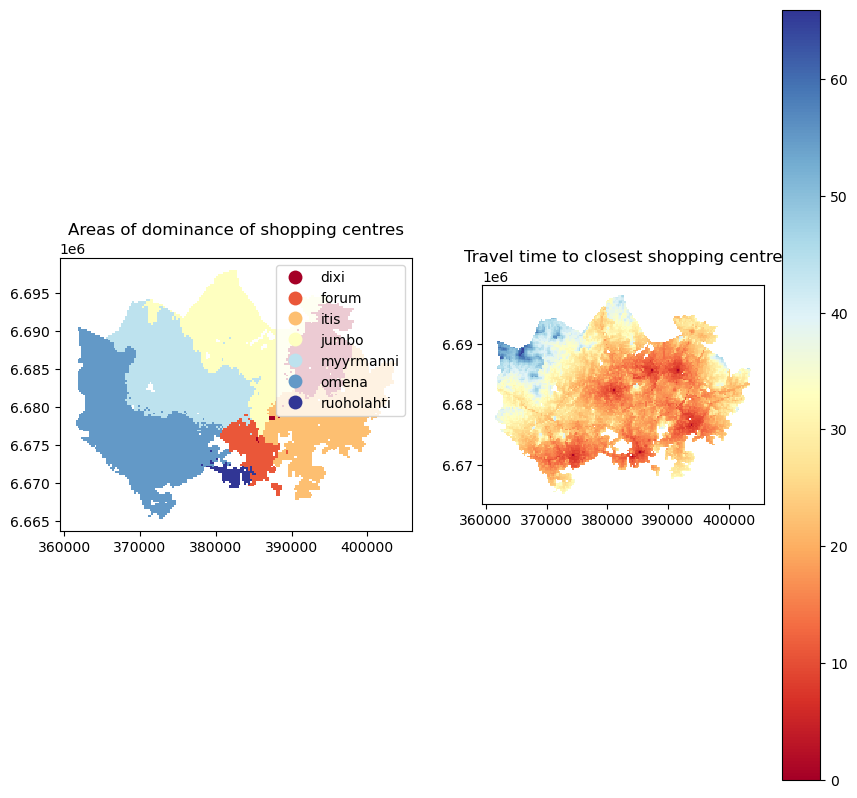

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))


ax1_1 = axes[0]
ax1_2 = axes[1]

travel_grid.plot(ax=ax1_1,column="dominance", cmap="RdYlBu", linewidth=0, legend=True)
travel_grid.plot(ax=ax1_2,column="min_travel_time", cmap="RdYlBu", linewidth=0, legend=True)


# Titles
ax1_1.title.set_text('Areas of dominance of shopping centres')
ax1_2.title.set_text('Travel time to closest shopping centre')
    

# Titles
plt.savefig(DATA_DIRECTORY/ "dominance_areas.png")
    
    
plt.show()

Great. We can see the areas of dominance for each of the seven supermarkets in the grid on the left. The distance from each grid area to each supermarket is calculated and the closest supermarket to that grid area is deemed to have `dominance`. 

The grid on the right shows the travel time to the nearest supermarket from each grid area. The largest travel times are in the top left which indicates that these areas are remote/have poor connection compared with the rest of the region.

In [28]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
assert (DATA_DIRECTORY / "dominance_areas.png").exists()


--- 

**Do not forget to plot the result map, and save it to `DATA_DIRECTORY / "dominance_areas.png"`!**

---

## Reflections

This was a significantly more complex exercise that previous ones, and it included finding
a solution yourself. 

- What was most difficult part? 
- Where did you get stuck? 
- What was the easiest, and
- what was the most fun part of this exercise?

Add your answer below


---

## Well done!

Congratulations, you completed exercise 4. Good Job!